In [61]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd

def diffusion_process(G, initial_set, k, activation_prob=0.5):
    """
    Simulate the diffusion process for k steps.
    
    Parameters:
      G: networkx graph.
      initial_set: the set of initially active nodes.
      k: number of diffusion steps.
      activation_prob: probability with which an active node activates a neighbor.
      
    Returns:
      A set of nodes activated after k steps.
    """
    activated = set(initial_set)   # Nodes that have been activated so far.
    frontier = set(initial_set)    # Nodes activated in the previous step.
    
    for step in range(k):
        new_frontier = set()
        for node in frontier:
            for neighbor in G.neighbors(node):
                if neighbor not in activated and random.random() < activation_prob:
                    new_frontier.add(neighbor)
        activated.update(new_frontier)
        frontier = new_frontier
        if not frontier:
            break
    return activated

# ---------------------------
# 1. Create an arbitrary network.
# ---------------------------
n = 50           # number of nodes in the network
p_edge = 0.1     # probability of edge creation between any two nodes
G = nx.erdos_renyi_graph(n, p_edge)

# ---------------------------
# 2. Input parameters and simulate the diffusion process.
# ---------------------------
alpha = int(input("Enter number of initial nodes (alpha): "))
k = int(input("Enter number of diffusion steps (k): "))


iterations = 10000
activation_counts = {node: 0 for node in G.nodes()}

for _ in range(iterations):
    # Randomly select the initial active set I_alpha.
    initial_set = random.sample(list(G.nodes()), alpha)
    activated = diffusion_process(G, initial_set, k, activation_prob=0.5)
    for node in activated:
        activation_counts[node] += 1

# Compute echo centrality.
echo_centrality = {node: activation_counts[node] / iterations for node in G.nodes()}
nx.set_node_attributes(G, echo_centrality, 'echo_centrality')

# print("\Echo Centrality (activation probability):")
# for node, cent in echo_centrality.items():
#     print(f"Node {node}: {cent:.4f}")

# ---------------------------
# 3. Calculate standard centrality measures.
# ---------------------------
degree_cent = nx.degree_centrality(G)
closeness_cent = nx.closeness_centrality(G)
betweenness_cent = nx.betweenness_centrality(G)
try:
    eigenvector_cent = nx.eigenvector_centrality(G)
except Exception as e:
    eigenvector_cent = {node: None for node in G.nodes()}

# ---------------------------
# 4. Create ranking lists for each centrality measure.
# ---------------------------
# Each sorted list contains the nodes sorted from highest centrality to lowest.
sorted_diffusion = [node for node, _ in sorted(echo_centrality.items(), key=lambda x: x[1], reverse=True)]
sorted_degree = [node for node, _ in sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)]
sorted_closeness = [node for node, _ in sorted(closeness_cent.items(), key=lambda x: x[1], reverse=True)]
sorted_betweenness = [node for node, _ in sorted(betweenness_cent.items(), key=lambda x: x[1], reverse=True)]
sorted_eigenvector = [node for node, _ in sorted(eigenvector_cent.items(), key=lambda x: x[1], reverse=True) 
                      if eigenvector_cent[node] is not None]

# Determine the maximum number of rows (should be equal to the number of nodes).
max_len = len(G.nodes())

# Create a DataFrame that lists the rankings.
ranking_table = pd.DataFrame({
    "Echo Centrality": pd.Series(sorted_diffusion),
    "Degree Centrality": pd.Series(sorted_degree),
    "Closeness Centrality": pd.Series(sorted_closeness),
    "Betweenness Centrality": pd.Series(sorted_betweenness),
    "Eigenvector Centrality": pd.Series(sorted_eigenvector)
})

print("\nRanking Table of top ten central nodes (sorted from most central to least):")
print(ranking_table.head(5).to_string(index=False))



Ranking Table of top ten central nodes (sorted from most central to least):
 Echo Centrality  Degree Centrality  Closeness Centrality  Betweenness Centrality  Eigenvector Centrality
              21                  5                    21                      33                       5
               5                 33                    33                       4                      21
              31                 21                     5                      21                       6
               6                 31                     6                      25                      31
              33                  4                    25                       5                      30


In [52]:
# ---------------------------
# 1. Define parameters.
# ---------------------------
k_values = [1, 2, 3, 4, 5]
alpha_list = [1, 5]
iterations = 10000

# This dictionary will store the echo centrality for each (alpha, k) combination.
# Keys will be tuples (alpha, k) and values are dictionaries mapping node -> activation probability.
echo_centrality_by_k_alpha = {}

# ---------------------------
# 2. Compute echo centrality for each (alpha, k) combination.
# ---------------------------
for alpha in alpha_list:
    # For each alpha, fix an initial set for consistency.
    for k in k_values:
        activation_counts = {node: 0 for node in G.nodes()}
        # Run the simulation iterations times.
        for _ in range(iterations):
            initial_set = random.sample(list(G.nodes()), alpha)
            activated = diffusion_process(G, initial_set, k, activation_prob=0.5)
            for node in activated:
                activation_counts[node] += 1
        # Compute activation probability for each node.
        echo_centrality = {node: activation_counts[node] / iterations for node in G.nodes()}
        echo_centrality_by_k_alpha[(alpha, k)] = echo_centrality
        

# ---------------------------
# 3. Create ranking lists for each (alpha, k) combination.
# ---------------------------
ranking_dict = {}
for (alpha, k), centrality in echo_centrality_by_k_alpha.items():
    # Sort nodes from highest to lowest echo centrality.
    sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    sorted_nodes = [node for node, _ in sorted_nodes]
    ranking_dict[f"Diffusion (alpha={alpha}, k={k})"] = pd.Series(sorted_nodes)

# Create a DataFrame with each column representing the ranking for a given (alpha, k) pair.
ranking_table = pd.DataFrame(ranking_dict)

print("\nRanking Table for Echo Centrality with Different Parameters (sorted from most to least central):")
print(ranking_table.head(5).to_string(index=False))


Ranking Table for Echo Centrality with Different Parameters (sorted from most to least central):
 Diffusion (alpha=1, k=1)  Diffusion (alpha=1, k=2)  Diffusion (alpha=1, k=3)  Diffusion (alpha=1, k=4)  Diffusion (alpha=1, k=5)  Diffusion (alpha=5, k=1)  Diffusion (alpha=5, k=2)  Diffusion (alpha=5, k=3)  Diffusion (alpha=5, k=4)  Diffusion (alpha=5, k=5)
                        3                         9                         9                         9                         9                        40                         9                         9                         9                         9
                       40                        22                        22                        22                        22                        22                        22                        22                        40                        40
                       22                        16                        41                        40                   

Completed echo centrality for k = 1
Completed echo centrality for k = 2
Completed echo centrality for k = 3
Completed echo centrality for k = 4
Completed echo centrality for k = 5
Completed echo centrality for k = 6
Completed echo centrality for k = 7
Completed echo centrality for k = 8
Completed echo centrality for k = 9
Completed echo centrality for k = 10
Completed echo centrality for k = 11
Completed echo centrality for k = 12
Completed echo centrality for k = 13
Completed echo centrality for k = 14
Completed echo centrality for k = 15
Completed echo centrality for k = 16
Completed echo centrality for k = 17
Completed echo centrality for k = 18
Completed echo centrality for k = 19
Completed echo centrality for k = 20
Top 5 nodes at k = 20: [9, 40, 22, 21, 41]


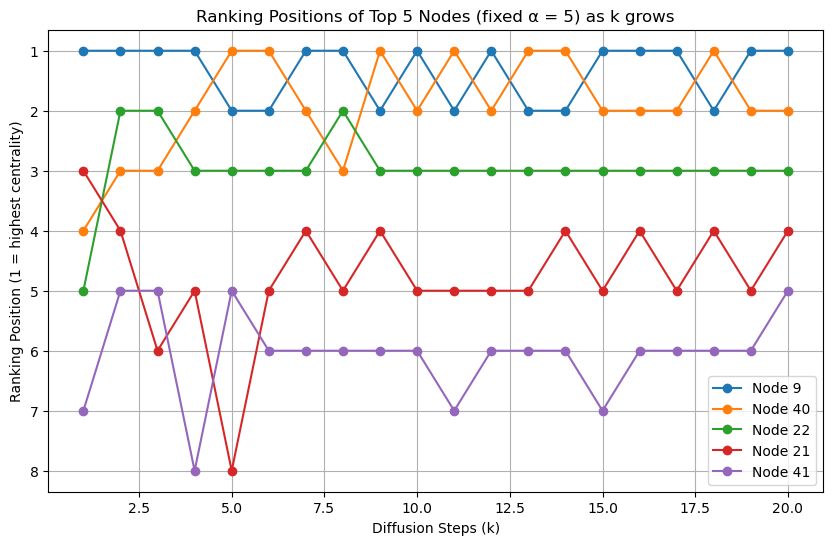

In [ ]:
# ---------------------------
# 1. Fix parameters.
# ---------------------------
alpha = 5
iterations = 10000
# Vary k from 1 to 20 (you can adjust the maximum value as needed)
k_range = list(range(1, 21))

# This dictionary will store echo centrality for each k.
# Format: { k_value: {node: activation_probability, ...}, ... }
echo_centrality_by_k = {}

for k in k_range:
    activation_counts = {node: 0 for node in G.nodes()}
    for _ in range(iterations):
        initial_set = random.sample(list(G.nodes()), alpha)
        activated = diffusion_process(G, initial_set, k, activation_prob=0.5)
        for node in activated:
            activation_counts[node] += 1
    echo_centrality = {node: activation_counts[node] / iterations for node in G.nodes()}
    echo_centrality_by_k[k] = echo_centrality
    print(f"Completed echo centrality for k = {k}")

# ---------------------------
# 2. Determine ranking positions.
# ---------------------------
# For each k, create a ranking: list of nodes sorted by centrality (highest first).
ranking_by_k = {}
for k in k_range:
    # sorted list of (node, centrality) pairs in descending order
    sorted_nodes = sorted(echo_centrality_by_k[k].items(), key=lambda x: x[1], reverse=True)
    # Create a mapping: node -> rank (1 is best)
    ranking = {node: rank+1 for rank, (node, _) in enumerate(sorted_nodes)}
    ranking_by_k[k] = ranking

# Use the top 5 nodes at the maximum k (here, k_range[-1]) as our reference.
ref_k = k_range[-1]
sorted_at_ref = sorted(echo_centrality_by_k[ref_k].items(), key=lambda x: x[1], reverse=True)
top5_nodes = [node for node, _ in sorted_at_ref[:5]]
print(f"Top 5 nodes at k = {ref_k}: {top5_nodes}")

# ---------------------------
# 3. Track ranking positions for the top 5 nodes as k grows.
# ---------------------------
# For each node in top5_nodes, record its ranking for each k.
rank_history = {node: [] for node in top5_nodes}
for k in k_range:
    for node in top5_nodes:
        rank_history[node].append(ranking_by_k[k][node])

# ---------------------------
# 4. Plot the ranking positions as k grows.
# ---------------------------
plt.figure(figsize=(10, 6))
for node, ranks in rank_history.items():
    plt.plot(k_range, ranks, marker='o', label=f'Node {node}')

plt.gca().invert_yaxis()  # Rank 1 at the top of the plot
plt.xlabel("Diffusion Steps (k)")
plt.ylabel("Ranking Position (1 = highest centrality)")
plt.title("Ranking Positions of Top 5 Nodes (fixed α = 5) as k grows")
plt.legend()
plt.grid(True)
plt.show()

Completed echo centrality for k = 1
Completed echo centrality for k = 2
Completed echo centrality for k = 3
Completed echo centrality for k = 4
Completed echo centrality for k = 5
Completed echo centrality for k = 6
Completed echo centrality for k = 7
Completed echo centrality for k = 8
Completed echo centrality for k = 9
Completed echo centrality for k = 10
Completed echo centrality for k = 11
Completed echo centrality for k = 12
Completed echo centrality for k = 13
Completed echo centrality for k = 14
Completed echo centrality for k = 15
Completed echo centrality for k = 16
Completed echo centrality for k = 17
Completed echo centrality for k = 18
Completed echo centrality for k = 19
Completed echo centrality for k = 20


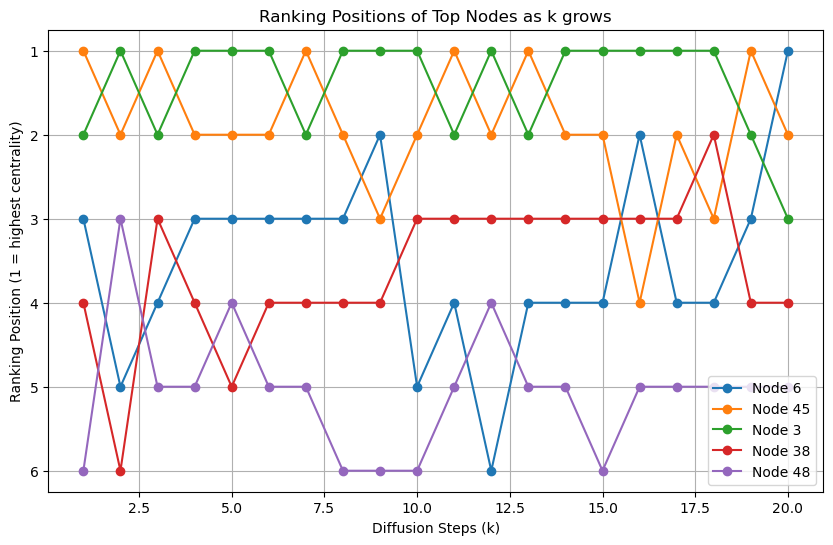

In [58]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd

class EchoCentrality:
    """
    A class to compute the echo centrality of nodes in a network.
    Echo centrality is based on a diffusion process where nodes are activated 
    over multiple steps, and their centrality is determined by the probability 
    of being activated.
    """

    def __init__(self, graph, alpha, iterations=10000, activation_prob=0.5):
        """
        Initializes the EchoCentrality object.

        Parameters:
            graph (networkx.Graph): The network (graph) in which centrality is calculated.
            alpha (int): The number of initial active nodes (seeds).
            iterations (int): The number of simulations to run for computing centrality.
            activation_prob (float): The probability that a node activates its neighbors.
        """
        self.G = graph
        self.alpha = alpha
        self.iterations = iterations
        self.activation_prob = activation_prob

    def diffusion_process(self, initial_set, k):
        """
        Simulate the diffusion process for k steps starting from the given initial set.

        Parameters:
            initial_set (set): The set of initially active nodes (seeds).
            k (int): Number of diffusion steps.
        
        Returns:
            set: The set of nodes activated after k steps.
        """
        activated = set(initial_set)
        frontier = set(initial_set)

        for _ in range(k):
            new_frontier = set()
            for node in frontier:
                for neighbor in self.G.neighbors(node):
                    if neighbor not in activated and random.random() < self.activation_prob:
                        new_frontier.add(neighbor)
            activated.update(new_frontier)
            frontier = new_frontier
            if not frontier:
                break
        return activated
    
    def calculate_echo_centrality(self, k):
        """
        Calculate echo centrality for each node by simulating the diffusion process 
        multiple times and computing the activation probabilities.
        
        Returns:
            dict: A dictionary with nodes as keys and their echo centrality as values.
        """
        self.k = k
        activation_counts = {node: 0 for node in self.G.nodes()}
        
        for _ in range(self.iterations):
            # Randomly select the initial active set I_alpha.
            initial_set = random.sample(list(self.G.nodes()), self.alpha)
            activated = self.diffusion_process(initial_set, k)
            for node in activated:
                activation_counts[node] += 1

        echo_centrality = {node: activation_counts[node] / self.iterations for node in self.G.nodes()}
        return echo_centrality
    
    def calculate_other_centralities(self):
        """
        Calculate other centrality measures: degree, closeness, betweenness, eigenvector, and pagerank.

        Returns:
            dict: A dictionary with centrality names as keys and corresponding values as dictionaries.
        """
        degree_cent = nx.degree_centrality(self.G)
        closeness_cent = nx.closeness_centrality(self.G)
        betweenness_cent = nx.betweenness_centrality(self.G)
        
        try:
            eigenvector_cent = nx.eigenvector_centrality(self.G)
        except Exception:
            eigenvector_cent = {node: None for node in self.G.nodes()}
        
        pagerank_cent = nx.pagerank(self.G)

        return {
            "degree": degree_cent,
            "closeness": closeness_cent,
            "betweenness": betweenness_cent,
            "eigenvector": eigenvector_cent,
            "pagerank": pagerank_cent
        }

    def rank_nodes(self, centralities):
        """
        Rank nodes according to their centrality values for each centrality measure.
        
        Parameters:
            centralities (dict): A dictionary with centrality names as keys and centrality values as dictionaries.
        
        Returns:
            pd.DataFrame: A DataFrame that ranks nodes based on different centrality measures.
        """
        rankings = {}
        for centrality_name, centrality_dict in centralities.items():
            sorted_nodes = [node for node, _ in sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)]
            rankings[centrality_name] = pd.Series(sorted_nodes)
        
        # Convert to DataFrame
        ranking_df = pd.DataFrame(rankings)
        return ranking_df

    def calculate_echo_centrality_by_k(self, k_range):
        """
        Calculate echo centrality for each node for different values of k.
        
        Parameters:
            k_range (list): List of values for diffusion steps.
        
        Returns:
            dict: A dictionary with k values as keys and corresponding echo centralities.
        """
        echo_centrality_by_k = {}
        
        for k in k_range:
            activation_counts = {node: 0 for node in self.G.nodes()}
            for _ in range(self.iterations):
                initial_set = random.sample(list(self.G.nodes()), self.alpha)
                activated = self.diffusion_process(initial_set, k)
                for node in activated:
                    activation_counts[node] += 1
            echo_centrality = {node: activation_counts[node] / self.iterations for node in self.G.nodes()}
            echo_centrality_by_k[k] = echo_centrality
            print(f"Completed echo centrality for k = {k}")

        return echo_centrality_by_k

    def rank_nodes_by_k(self, echo_centrality_by_k):
        """
        Rank nodes according to their centrality values for each k.
        
        Parameters:
            echo_centrality_by_k (dict): A dictionary with k values and corresponding centrality values.
        
        Returns:
            pd.DataFrame: A DataFrame that ranks nodes based on different centrality measures.
        """
        ranking_by_k = {}
        for k, echo_centrality in echo_centrality_by_k.items():
            sorted_nodes = [node for node, _ in sorted(echo_centrality.items(), key=lambda x: x[1], reverse=True)]
            ranking_by_k[k] = {node: rank + 1 for rank, node in enumerate(sorted_nodes)}

        return ranking_by_k

    def plot_rankings_as_k_grows(self, ranking_by_k, top_nodes, k_range):
        """
        Plot the rankings of the top nodes as the number of diffusion steps (k) grows.
        
        Parameters:
            ranking_by_k (dict): A dictionary with k values and corresponding ranking information.
            top_nodes (list): A list of the top nodes to track.
            k_range (list): The range of k values.
        """
        rank_history = {node: [] for node in top_nodes}
        for k in k_range:
            for node in top_nodes:
                rank_history[node].append(ranking_by_k[k][node])

        plt.figure(figsize=(10, 6))
        for node, ranks in rank_history.items():
            plt.plot(k_range, ranks, marker='o', label=f'Node {node}')

        plt.gca().invert_yaxis()  # Rank 1 at the top of the plot
        plt.xlabel("Diffusion Steps (k)")
        plt.ylabel("Ranking Position (1 = highest centrality)")
        plt.title("Ranking Positions of Top Nodes as k grows")
        plt.legend()
        plt.grid(True)
        plt.show()

    def compute_and_plot_rankings(self, k_range):
        """
        Compute echo centrality and plot the ranking of nodes as k grows.
        
        Parameters:
            k_range (list): The range of k values for which to compute centrality.
        """
        # Calculate echo centrality for each k
        echo_centrality_by_k = self.calculate_echo_centrality_by_k(k_range)

        # Rank nodes based on their centrality for each k
        ranking_by_k = self.rank_nodes_by_k(echo_centrality_by_k)

        # Use the top nodes at the maximum k as our reference
        ref_k = k_range[-1]
        sorted_at_ref = sorted(echo_centrality_by_k[ref_k].items(), key=lambda x: x[1], reverse=True)
        top_nodes = [node for node, _ in sorted_at_ref[:5]]

        # Plot the rankings of the top nodes as k grows
        self.plot_rankings_as_k_grows(ranking_by_k, top_nodes, k_range)


# Example usage:
# Create an Erdős–Rényi random graph with 50 nodes and probability 0.1
G = nx.erdos_renyi_graph(50, 0.1)

# Initialize the EchoCentrality object with parameters
ec = EchoCentrality(G, alpha=5)

# Vary k from 1 to 20 (you can adjust the maximum value as needed)
k_range = list(range(1, 21))

# Compute and plot the ranking of nodes as k grows
ec.compute_and_plot_rankings(k_range)

In [ ]:
# Compute diffusion centrality
echo_centrality = ec.calculate_echo_centrality(k=5)

# Calculate other centralities (degree, closeness, betweenness, eigenvector, pagerank)
other_centralities = ec.calculate_other_centralities()

# Rank nodes based on different centralities
ranking_df = ec.rank_nodes({
    "echo": echo_centrality,
    "degree": other_centralities["degree"],
    "closeness": other_centralities["closeness"],
    "betweenness": other_centralities["betweenness"],
    "eigenvector": other_centralities["eigenvector"],
    "pagerank": other_centralities["pagerank"]
})

# Display the ranking table of top 5 nodes
print("Ranking Table of Top 5 Nodes:")
print(ranking_df.head(5).to_string(index=False))

Ranking Table of Top 5 Nodes:
 echo  degree  closeness  betweenness  eigenvector  pagerank
    3       3         45           45            3         3
   48      45          3            3           48        45
   45       6         38            6           38         6
    6      38          6           17           39        38
   38       1         31           38           45        17
